<a href="https://colab.research.google.com/github/ihyaulumuddin044/Pengantar_ML/blob/main/modules/Random_Forest_Regression/Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv('student_habits_performance.csv')
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [123]:
print(df)

    student_id  age  gender  study_hours_per_day  social_media_hours  \
0        S1000   23  Female                  0.0                 1.2   
1        S1001   20  Female                  6.9                 2.8   
2        S1002   21    Male                  1.4                 3.1   
3        S1003   23  Female                  1.0                 3.9   
4        S1004   19  Female                  5.0                 4.4   
..         ...  ...     ...                  ...                 ...   
995      S1995   21  Female                  2.6                 0.5   
996      S1996   17  Female                  2.9                 1.0   
997      S1997   20    Male                  3.0                 2.6   
998      S1998   24    Male                  5.4                 4.1   
999      S1999   19  Female                  4.3                 2.9   

     netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0              1.1            No                   85.0        

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [124]:
df.shape

(1000, 16)

In [83]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


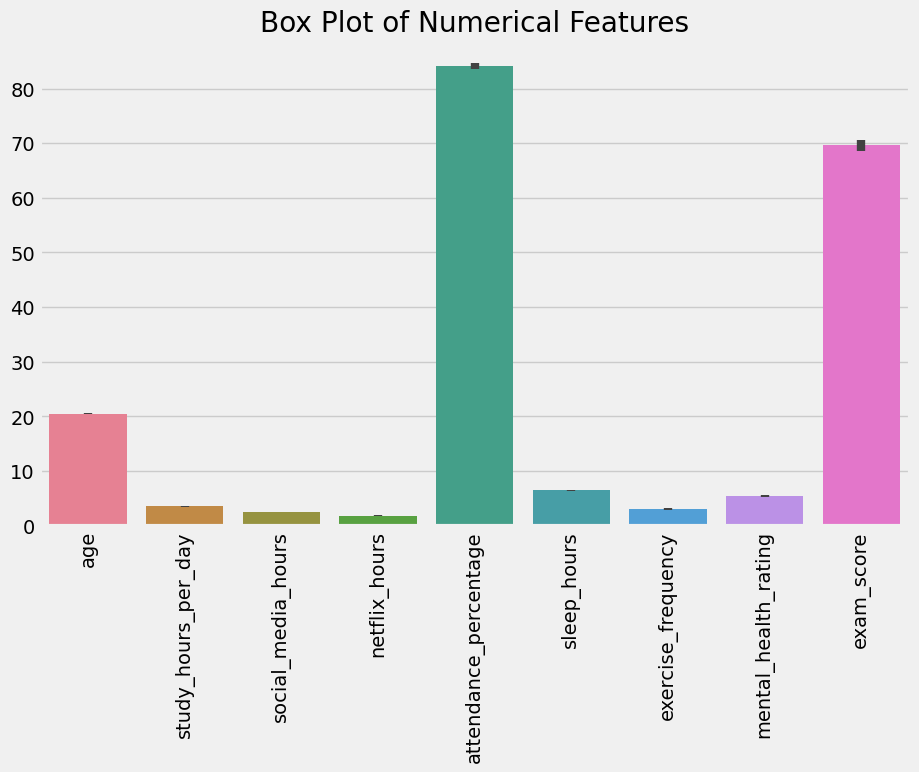

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df.select_dtypes(include=[np.number])) # Changed to boxplot using seaborn
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features")
plt.show()

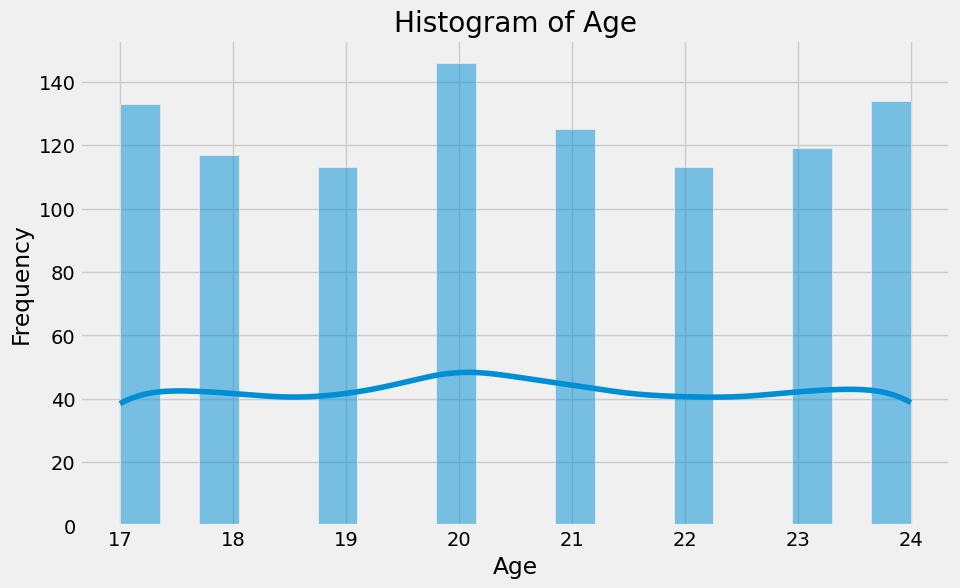

In [85]:
age = df['age']

plt.figure(figsize=(10, 6))
sns.histplot(age, bins=20, kde=True)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Count')

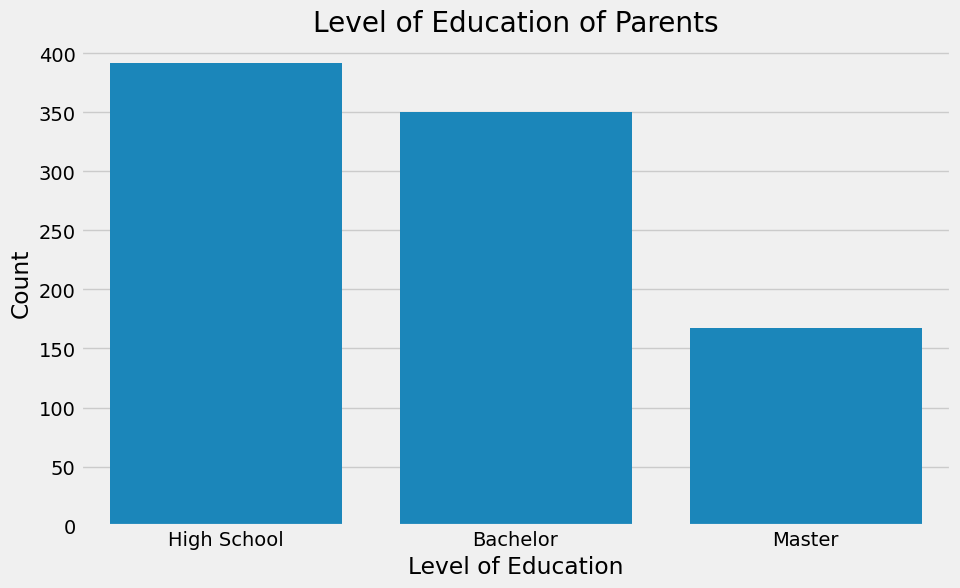

In [86]:
level_education = df['parental_education_level'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=level_education.index, y=level_education.values)
plt.title("Level of Education of Parents")
plt.xlabel("Level of Education")
plt.ylabel("Count")

In [114]:
from sklearn.preprocessing import LabelEncoder
df_le = df.copy()
df_le.drop('student_id', axis=1, inplace=True)
le = LabelEncoder()
df_le['gender'] = le.fit_transform(df_le['gender'])
df_le['part_time_job'] = le.fit_transform(df_le['part_time_job'])
df_le['diet_quality'] = le.fit_transform(df_le['diet_quality'])
df_le['parental_education_level'] = le.fit_transform(df_le['parental_education_level'])
df_le['internet_quality'] = le.fit_transform(df_le['internet_quality'])
df_le['extracurricular_participation'] = le.fit_transform(df_le['extracurricular_participation'])

print(df_le)


     age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
0     23       0                  0.0                 1.2            1.1   
1     20       0                  6.9                 2.8            2.3   
2     21       1                  1.4                 3.1            1.3   
3     23       0                  1.0                 3.9            1.0   
4     19       0                  5.0                 4.4            0.5   
..   ...     ...                  ...                 ...            ...   
995   21       0                  2.6                 0.5            1.6   
996   17       0                  2.9                 1.0            2.4   
997   20       1                  3.0                 2.6            1.3   
998   24       1                  5.4                 4.1            1.1   
999   19       0                  4.3                 2.9            1.9   

     part_time_job  attendance_percentage  sleep_hours  diet_quality  \
0              

In [88]:
X = df_le.drop('exam_score', axis=1)
y = df_le['exam_score']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(max_depth= 5,n_estimators=100, random_state=42, n_jobs= 1)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 50.58696081302
R-squared: 0.8178762202475587


In [152]:
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nEvaluasi Performa Model pada Data Training:")
print("Mean Squared Error (Training):", train_mse)
print("R-squared (Training):", train_r2)

print("\nEvaluasi Performa Model pada Data Testing:")
print("Mean Squared Error (Testing):", mse)
print("R-squared (Testing):", r2)




Evaluasi Performa Model pada Data Training:
Mean Squared Error (Training): 31.58506104764676
R-squared (Training): 0.8902368284102972

Evaluasi Performa Model pada Data Testing:
Mean Squared Error (Testing): 50.58696081302
R-squared (Testing): 0.8178762202475587


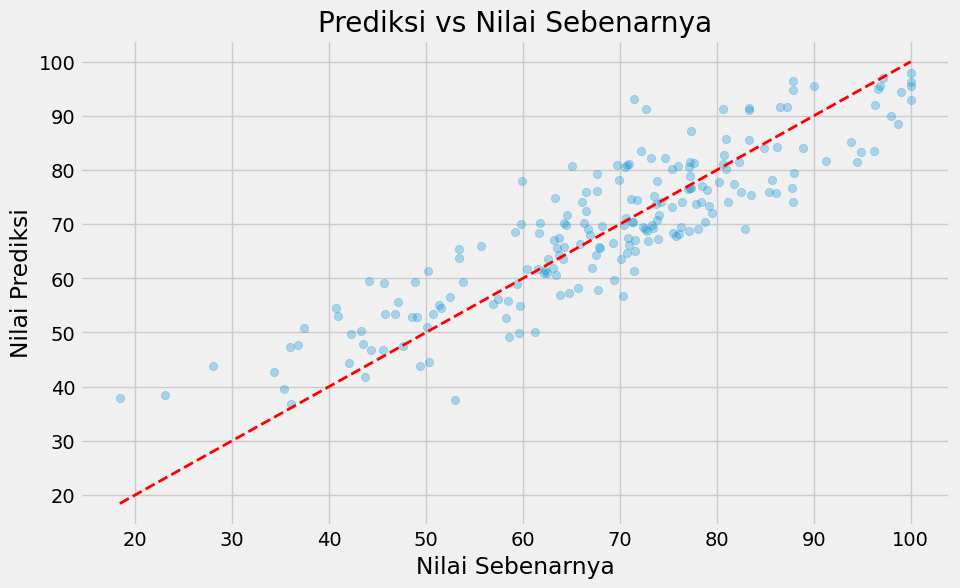

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Nilai Prediksi")
plt.title("Prediksi vs Nilai Sebenarnya")
plt.grid(True)
plt.show()

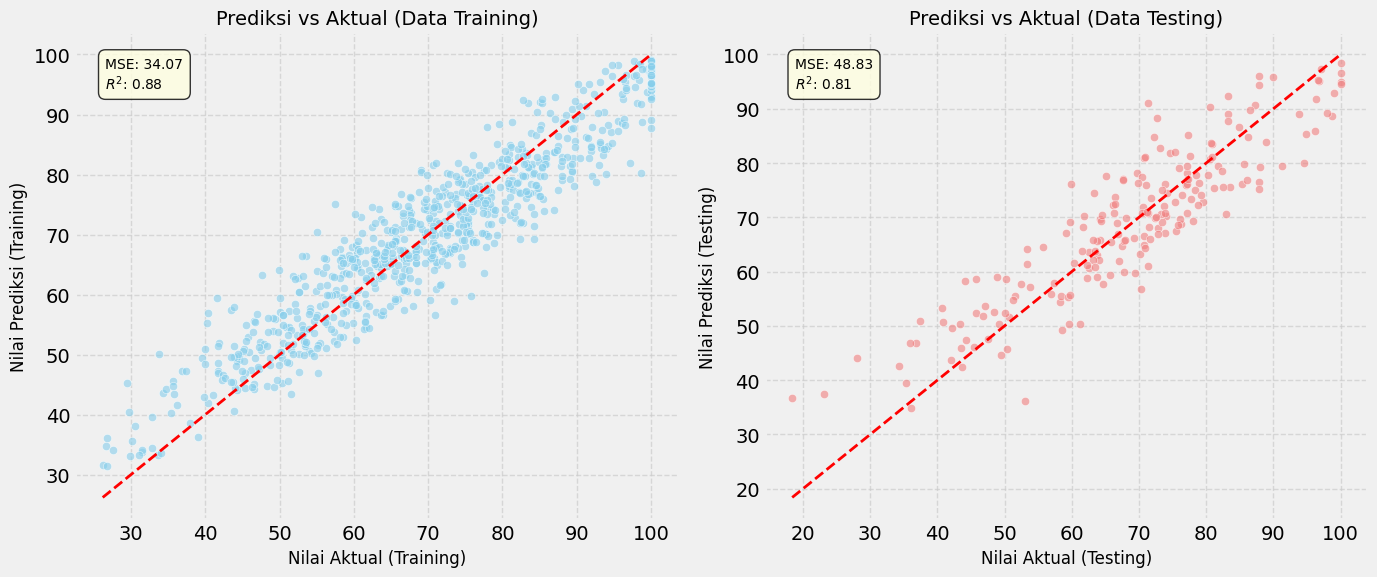

In [125]:
# Visualisasi Prediksi vs Aktual untuk Data Training dan Testing
plt.figure(figsize=(14, 6))

# Plot pertama untuk Training Data
plt.subplot(1, 2, 1)
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


plt.scatter(y_train, y_train_pred, alpha=0.6, color='skyblue', edgecolors='w', linewidth=0.5)
# Garis y=x (prediksi sempurna)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel("Nilai Aktual (Training)", fontsize=12)
plt.ylabel("Nilai Prediksi (Training)", fontsize=12)
plt.title("Prediksi vs Aktual (Data Training)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
# Tambahkan teks metrik
plt.text(0.05, 0.95, f'MSE: {mse_train:.2f}\n$R^2$: {r2_train:.2f}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', fc='lightyellow', ec='black', lw=1, alpha=0.8))


# Plot kedua untuk Testing Data
plt.subplot(1, 2, 2)
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

plt.scatter(y_test, y_test_pred, alpha=0.6, color='lightcoral', edgecolors='w', linewidth=0.5)
# Garis y=x (prediksi sempurna)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Nilai Aktual (Testing)", fontsize=12)
plt.ylabel("Nilai Prediksi (Testing)", fontsize=12)
plt.title("Prediksi vs Aktual (Data Testing)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
# Tambahkan teks metrik
plt.text(0.05, 0.95, f'MSE: {mse_test:.2f}\n$R^2$: {r2_test:.2f}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', fc='lightyellow', ec='black', lw=1, alpha=0.8))

plt.tight_layout()
plt.show()


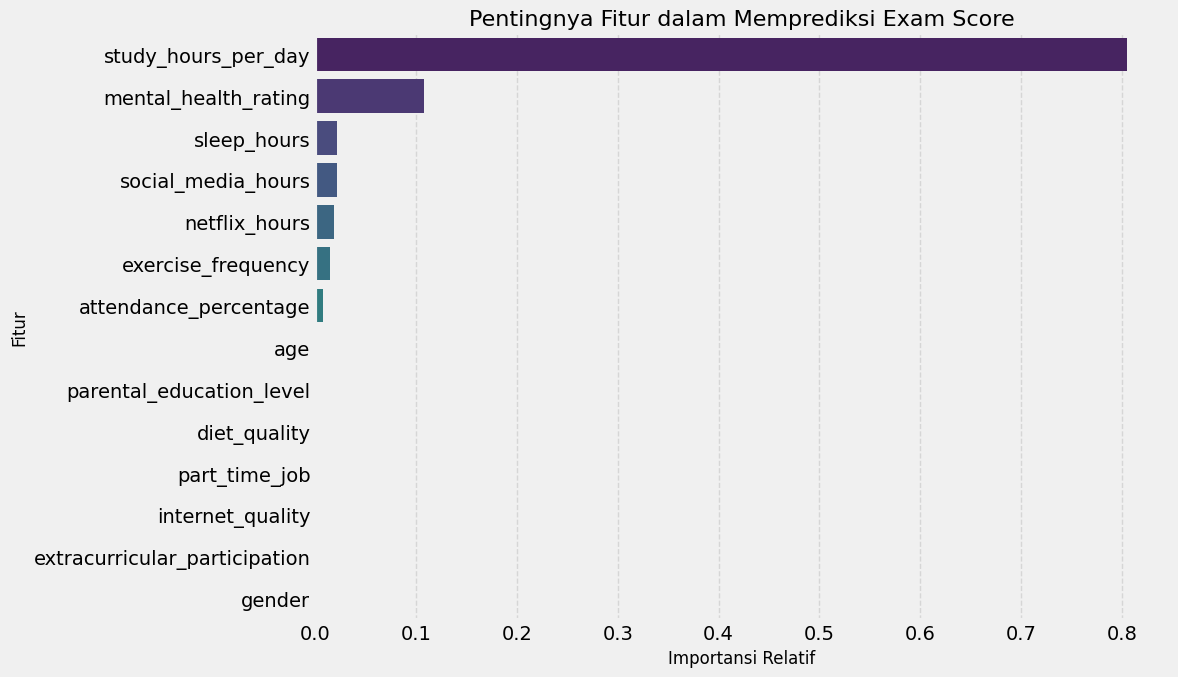

In [120]:
# Menampilkan Feature Importances
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1] # Mengurutkan dari yang paling penting

plt.figure(figsize=(12, 7))
plt.title("Pentingnya Fitur dalam Memprediksi Exam Score", fontsize=16)
sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
plt.xlabel("Importansi Relatif", fontsize=12)
plt.ylabel("Fitur", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

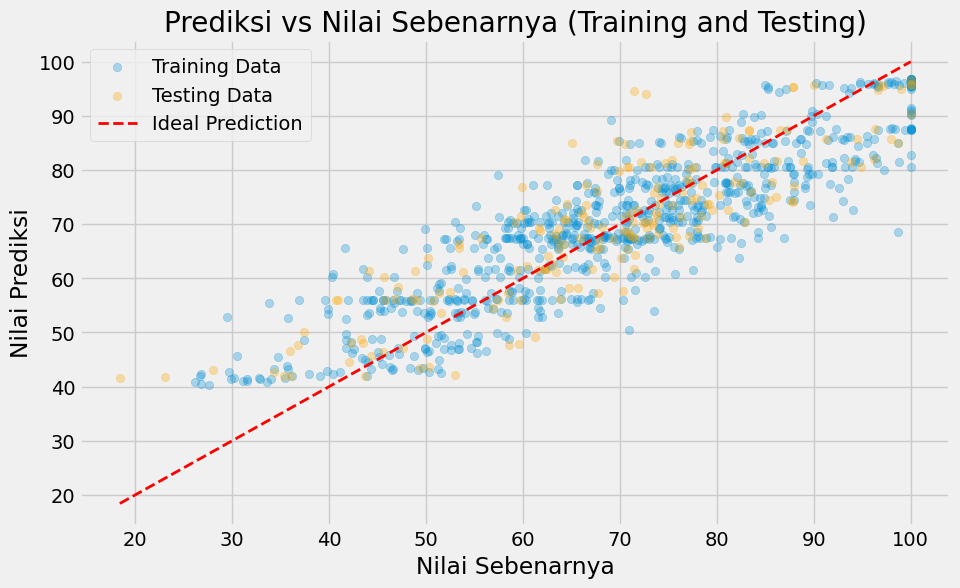

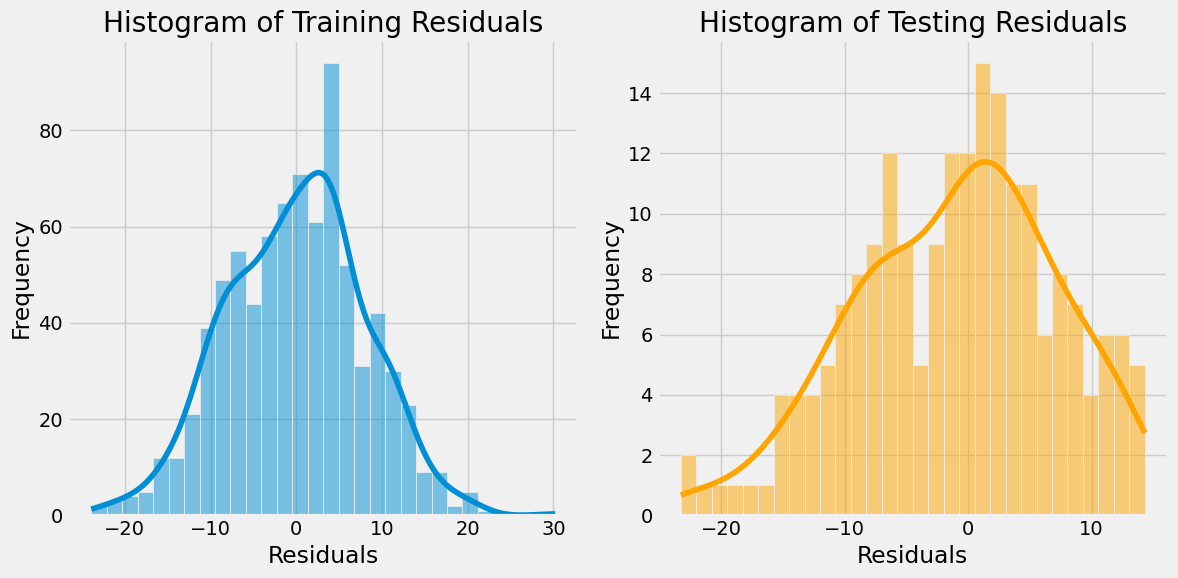

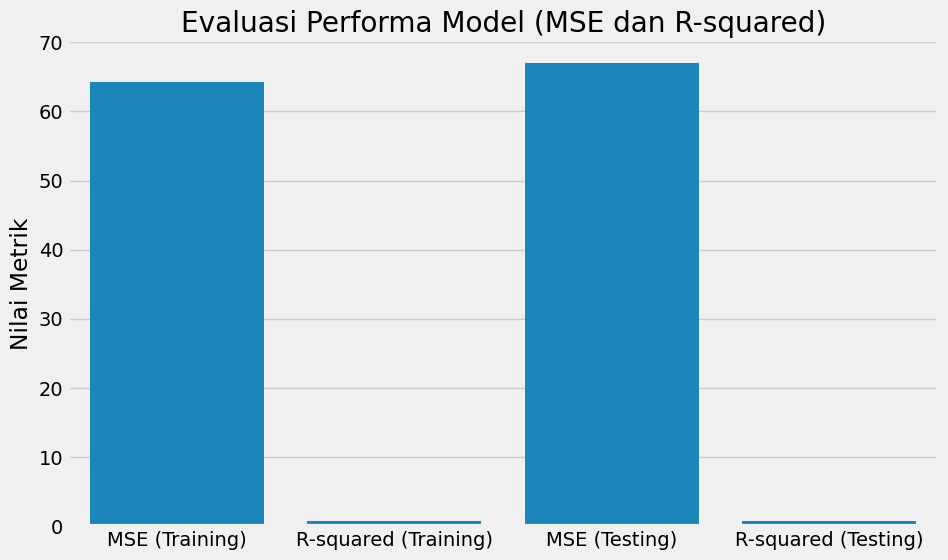

In [110]:
# Visualize predictions vs actual values for training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.3, label='Training Data')
plt.scatter(y_test, y_pred, alpha=0.3, color='orange', label='Testing Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Prediction')
plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Nilai Prediksi")
plt.title("Prediksi vs Nilai Sebenarnya (Training and Testing)")
plt.legend()
plt.grid(True)
plt.show()

# Visualize residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_pred

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_train, bins=30, kde=True)
plt.title("Histogram of Training Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(residuals_test, bins=30, kde=True, color='orange')
plt.title("Histogram of Testing Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Visualize performance metrics
metrics_names = ['MSE (Training)', 'R-squared (Training)', 'MSE (Testing)', 'R-squared (Testing)']
metrics_values = [train_mse, train_r2, mse, r2]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_names, y=metrics_values)
plt.title("Evaluasi Performa Model (MSE dan R-squared)")
plt.ylabel("Nilai Metrik")
plt.show()